## Data preparation

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator #data preparation
from IPython.display import Image, display #visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf #to define LSTM

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


c:\Users\jansc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jansc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\jansc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv('Data/energydata_complete.csv')
df


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df[['date', 'T_out', 'Appliances', 'lights']]


,date,T_out,Appliances,lights
0,2016-01-11 17:00:00,6.600000,60,30
1,2016-01-11 17:10:00,6.483333,60,30
2,2016-01-11 17:20:00,6.366667,50,30
3,2016-01-11 17:30:00,6.250000,50,40
4,2016-01-11 17:40:00,6.133333,60,40
...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,100,0
19731,2016-05-27 17:30:00,22.600000,90,0
19732,2016-05-27 17:40:00,22.466667,270,10
19733,2016-05-27 17:50:00,22.333333,420,10


array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>], dtype=object)

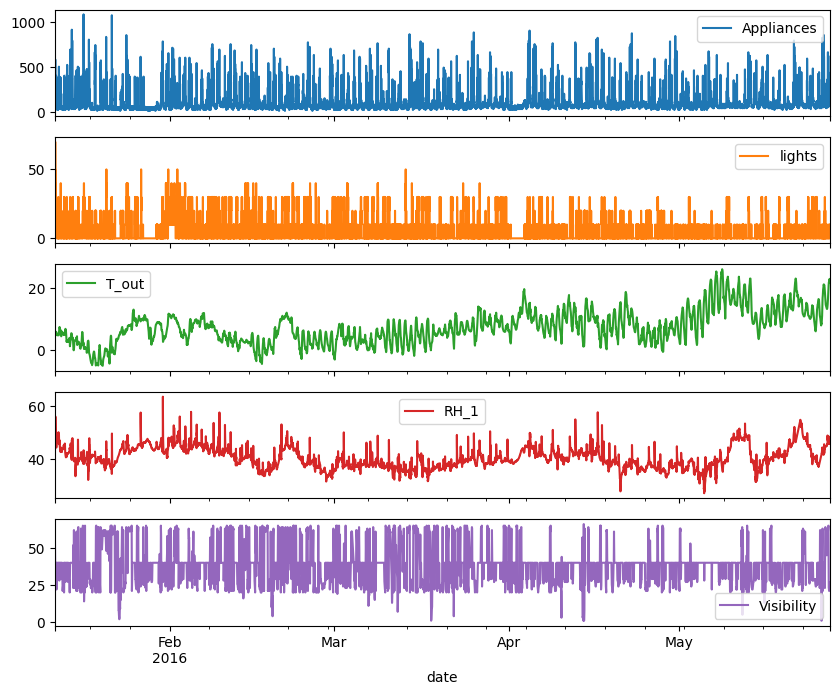

In [6]:
#converting object data type of date to datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format= True)

df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots= True)




In [7]:
df_input = df[['Appliances', 'T_out', 'RH_1', 'Visibility']]
df_input
#user selection for input need to be done

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [8]:
df_input.describe()


,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


## scaling the input so that it converges faster

In [9]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)


In [10]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [11]:
features = data_scaled #Appliance, Temp, humidity and visibility as input
target = data_scaled[:,0] #appliance as target for prediction

In [12]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]  #sampling rate is 1 bcz we want continuous values for prediction


(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state= 123, shuffle = False)

In [14]:
x_train.shape

(15788, 4)

In [15]:
x_test.shape


(3947, 4)

In [16]:
win_length = 720 #5 days of data
batch_size = 32
num_features = 4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

## defining a LSTM model

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences= False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [40]:
num_features

4

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode= min)


In [20]:
model.compile (loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.RootMeanSquaredError()])  #use rmse and check resule


In [39]:
history = model.fit(train_generator, epochs=5,shuffle= False, callbacks=[early_stopping])

Epoch 1/5
  8/471 [..............................] - ETA: 5:49 - loss: 0.0084 - root_mean_squared_error: 0.0914

KeyboardInterrupt: 

In [22]:
model.evaluate(test_generator, verbose=0)

[0.0031833734828978777, 0.056421391665935516]

In [23]:
predictions=model.predict(test_generator)

101/101 [==============================] - 27s 262ms/step


In [47]:
predictions.shape #taking 1st prediction for comparison

(3227, 1)

In [44]:
pd.DataFrame(predictions) #scaled prediction

,0
0,0.068704
1,0.084944
2,0.108455
3,0.314755
4,0.143711
...,...
3222,0.084962
3223,0.096953
3224,0.087410
3225,0.235777


In [26]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [27]:
x_test[:,1:][win_length:] #remove 1st 720 entries since they are not part of predictions

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [28]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [29]:
df_pred

,0,0,1,2
0,0.068704,0.453376,0.208513,0.600000
1,0.084944,0.471061,0.182827,0.600000
2,0.108455,0.488746,0.184662,0.600000
3,0.314755,0.506431,0.193996,0.600000
4,0.143711,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.084962,0.891747,0.537657,0.348718
3223,0.096953,0.887460,0.536006,0.361538
3224,0.087410,0.883173,0.538666,0.374359
3225,0.235777,0.878885,0.549491,0.387179


In [30]:
rev_trans=scaler.inverse_transform(df_pred)

In [31]:
rev_trans

array([[ 83.51277947,   9.1       ,  34.6       ,  40.        ],
       [100.89015424,   9.65      ,  33.66666667,  40.        ],
       [126.046701  ,  10.2       ,  33.73333333,  40.        ],
       ...,
       [103.52868721,  22.46666667,  46.59666667,  25.33333333],
       [262.28106111,  22.33333333,  46.99      ,  26.16666667],
       [303.66979539,  22.2       ,  46.6       ,  27.        ]])

In [32]:
df_final=df_input[predictions.shape[0]*-1:]

In [33]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [34]:
df_final['App_Pred']=rev_trans[:,0]

C:\Users\jansc\AppData\Local\Temp\ipykernel_21240\2704095297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [35]:
df_final

,Appliances,T_out,RH_1,Visibility,App_Pred
16508,90,9.100000,34.600000,40.000000,83.512779
16509,120,9.650000,33.666667,40.000000,100.890154
16510,390,10.200000,33.733333,40.000000,126.046701
16511,240,10.750000,34.072500,40.000000,346.788161
16512,120,11.300000,33.630000,40.000000,163.770994
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,100.909511
19731,90,22.600000,46.500000,24.500000,113.739284
19732,270,22.466667,46.596667,25.333333,103.528687
19733,420,22.333333,46.990000,26.166667,262.281061


<AxesSubplot: >

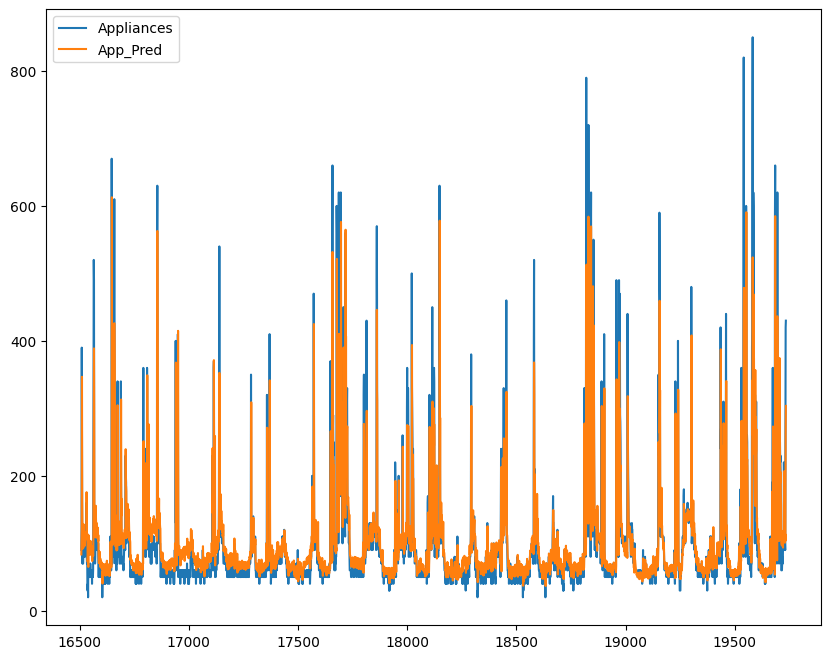

In [38]:
df_final[['Appliances','App_Pred']].plot()

In [50]:
df_final_cut = df_final[0:100]

<AxesSubplot: >

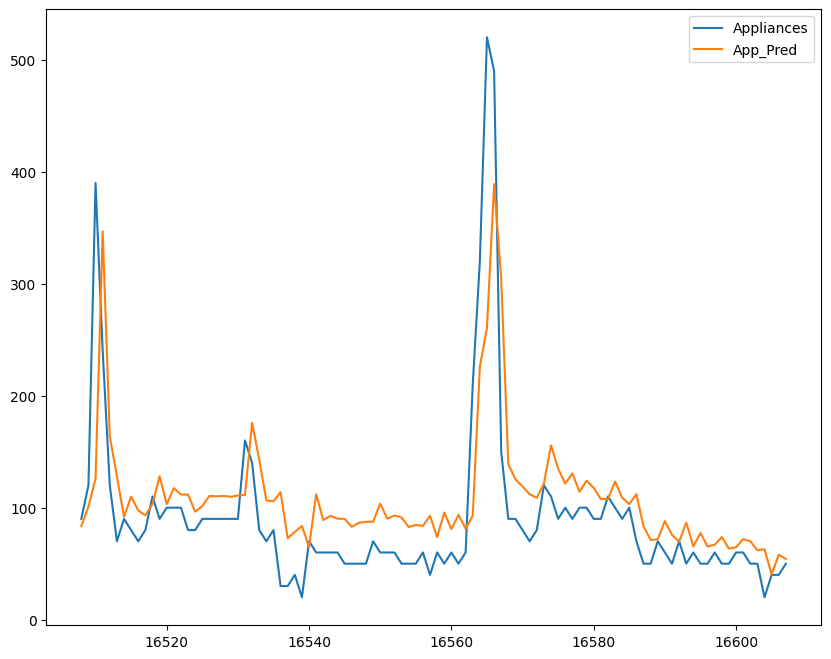

In [51]:
df_final_cut[['Appliances','App_Pred']].plot()

In [37]:
df_final.to_excel('Predicted_Appliance.xlsx')


ModuleNotFoundError: No module named 'openpyxl'

### OP: error measures to be added in fig for result (necessary)
### PROCESSING: smoothing of data (optional)
### LSTM : let user feed alpha, window length and batch size
### INPUT: option to select input and output coulmns
### keep trained model ready for certain  combinations